In [ ]:
import os
from glob import glob
import pandas as pd
import numpy as np
import numpy as np 

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import zipfile
import os

# Specify the path to the zip file
zip_file_path = 'C:/Users/kiran/Downloads/archive (5).zip'

# Specify the directory where you want to extract the files
extracted_dir_path = 'C:/Users/kiran/OneDrive/Desktop/Data_mining_project'

# Create the directory if it doesn't exist
os.makedirs(extracted_dir_path, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir_path)

print("Dataset extracted successfully.")

Dataset extracted successfully.


In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline
import glob
import PIL
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense)
from tensorflow.keras import backend as K

In [4]:
train_dir = os.path.join("C:/Users/kiran/OneDrive/Desktop/Data_mining_project/train")
test_dir = os.path.join("C:/Users/kiran/OneDrive/Desktop/Data_mining_project/test")
val_dir = os.path.join("C:/Users/kiran/OneDrive/Desktop/Data_mining_project/val")
print("Number of images in Trian is {}".format(len(glob(train_dir + "*/*"))))
print("Number of images in Test is {}".format(len(glob(test_dir + "*/*"))))
print("Number of images in Validation is {}".format(len(glob(val_dir + "*/*"))))
normal = os.listdir("C:/Users/kiran/OneDrive/Desktop/Data_mining_project/train/NORMAL")
covid = os.listdir("C:/Users/kiran/OneDrive/Desktop/Data_mining_project/train/COVID19")
pneumonia = os.listdir("C:/Users/kiran/OneDrive/Desktop/Data_mining_project/train/PNEUMONIA")
tuberculosis= os.listdir("C:/Users/kiran/OneDrive/Desktop/Data_mining_project/train/TURBERCULOSIS")

Number of images in Trian is 4
Number of images in Test is 4
Number of images in Validation is 4


<Axes: >

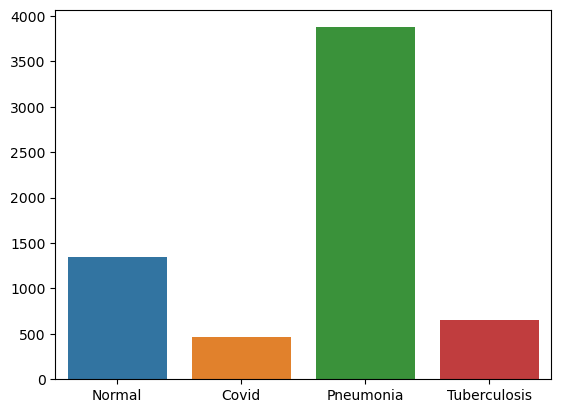

In [7]:
sns.barplot(x=["Normal","Covid","Pneumonia","Tuberculosis"],y=[len(normal),len(covid),len(pneumonia),len(tuberculosis)])

In [12]:
from PIL import Image
import os

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint

# As the dataset is divided into folders
from tensorflow.keras.preprocessing.image import ImageDataGenerator

w,h = 400,400
batch_size = 32

train_path = 'C:/Users/kiran/OneDrive/Desktop/Data_mining_project/train'
test_path = 'C:/Users/kiran/OneDrive/Desktop/Data_mining_project/test'
val_path = 'C:/Users/kiran/OneDrive/Desktop/Data_mining_project/val'

train_img_gen = ImageDataGenerator(
    rescale = 1.0/255,
    zoom_range=0.3
)

test_img_gen = ImageDataGenerator(
    rescale = 1.0/255
)

val_img_gen = ImageDataGenerator(
    rescale = 1.0/255
)

train_dataset = train_img_gen.flow_from_directory(
    train_path,
    target_size = (w,h),
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle = True
)

test_dataset = test_img_gen.flow_from_directory(
    test_path,
    target_size = (w,h),
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle = False
)

val_dataset = val_img_gen.flow_from_directory(
    val_path,
    target_size = (w,h),
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle = False
)

Found 6326 images belonging to 4 classes.
Found 771 images belonging to 4 classes.
Found 38 images belonging to 4 classes.


In [13]:
train_dataset.class_indices

{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2, 'TURBERCULOSIS': 3}

(32, 400, 400, 3)


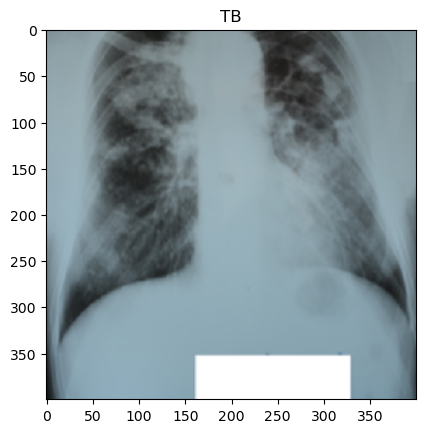

(32, 400, 400, 3)


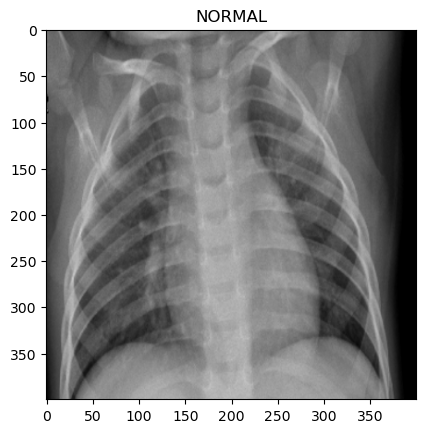

(32, 400, 400, 3)


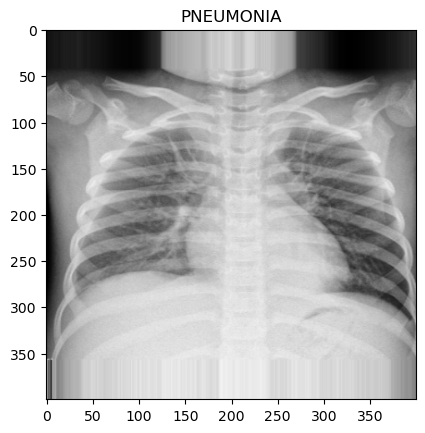

(32, 400, 400, 3)


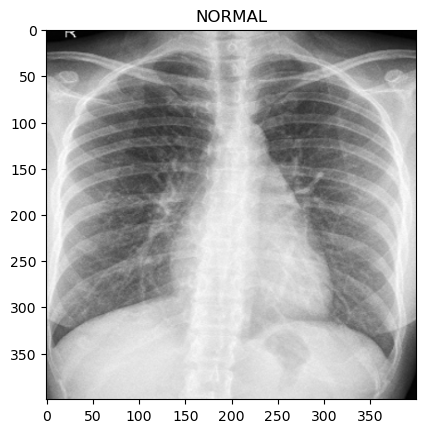

(32, 400, 400, 3)


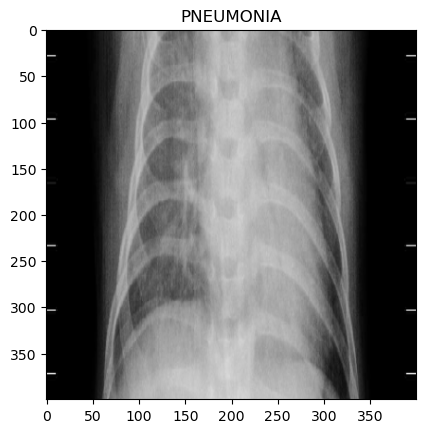

In [16]:
classes = ['COVID19', 'NORMAL', 'PNEUMONIA', 'TB']

for _ in range(5):
    img, label = train_dataset.next()
    print(img.shape)
    plt.title(classes[np.argmax(label[0])])
    plt.imshow(img[0])
    plt.show()

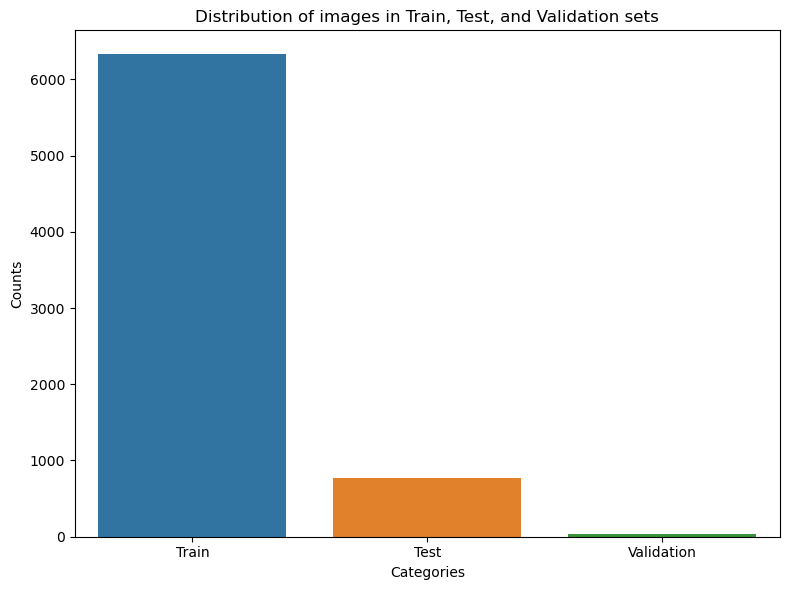

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt

# Data
categories = ["Train", "Test", "Validation"]
counts = [6326, 771, 38]

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=categories, y=counts)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Distribution of images in Train, Test, and Validation sets')
plt.tight_layout()
plt.show()



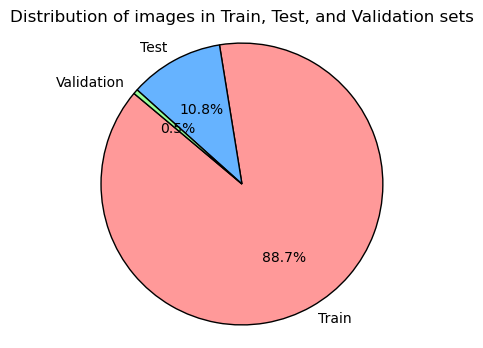

In [24]:
import matplotlib.pyplot as plt

# Data
categories = ["Train", "Test", "Validation"]
counts = [6326, 771, 38]

# Custom colors for each category
colors = ['#ff9999', '#66b3ff', '#99ff99']

# Plotting
plt.figure(figsize=(4, 4))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'edgecolor': 'black'})
plt.title('Distribution of images in Train, Test, and Validation sets')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [25]:
data_generator_1 = ImageDataGenerator(
                            rescale=1./255,
                            rotation_range=5,
                            width_shift_range=0.05,
                            height_shift_range=0.05,
                            shear_range=0.05,
                            zoom_range=0.05,
                            brightness_range = [0.95,1.05],
                            horizontal_flip=False,
                            vertical_flip=False,
                            fill_mode='nearest'                                   
                        )

print('Data Augmentation 1 was created')

data_generator_2 = ImageDataGenerator(
                            rescale=1./255,
                            rotation_range=10,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            shear_range=0.1,
                            zoom_range=0.1,
                            brightness_range = [0.9,1.1],
                            horizontal_flip=False,
                            vertical_flip=False,
                            fill_mode='nearest'                                   
                        )
print('Data Augmentation 2 was created')

data_generator_3 = ImageDataGenerator (rescale=1./255)

Data Augmentation 1 was created
Data Augmentation 2 was created


In [27]:
BATCH_SIZE = 48

image_height = 299
image_width = 299
train_generator1 = data_generator_1.flow_from_directory(
    directory = "C:/Users/kiran/OneDrive/Desktop/Data_mining_project/train", # images data path / folder in which images are there
    color_mode = "rgb",
    target_size = (image_height, image_width), # image height , image width
    class_mode = "categorical",
    batch_size = BATCH_SIZE,
    shuffle = True,
    seed = 42)

print('Data Augmentation 1 was used to generate train data set\n')
test_generator = data_generator_3.flow_from_directory(
    directory = "C:/Users/kiran/OneDrive/Desktop/Data_mining_project/test", # images data path / folder in which images are there
    color_mode = "rgb",
    target_size = (image_height, image_width), # image height , image width
    class_mode = "categorical",
    batch_size = BATCH_SIZE,
    shuffle = True,
    seed = 42)
Val_generator = data_generator_3.flow_from_directory(
    directory = "C:/Users/kiran/OneDrive/Desktop/Data_mining_project/val", # images data path / folder in which images are there
    color_mode = "rgb",
    target_size = (image_height, image_width), # image height , image width
    class_mode = "categorical",
    batch_size = BATCH_SIZE,
    shuffle = True,
    seed = 42)

Found 6326 images belonging to 4 classes.
Data Augmentation 1 was used to generate train data set

Found 771 images belonging to 4 classes.
Found 38 images belonging to 4 classes.


In [32]:
print("Dataset Characteristics of Train Data Set:")
print("Number of images:", len(train_generator1.classes))
print("Number of normal images:", len([label for label in train_generator1.classes if label == 1]))
print("Number of pneumonia images:", len([label for label in train_generator1.classes if label == 2]))
print("Number of COVID19 images:", len([label for label in train_generator1.classes if label == 0]))
print("Number of TUBERCULOSIS images:", len([label for label in train_generator1.classes if label == 3]))
print()

print("Dataset Characteristics of Test Data Set:")
print("Number of normal images:", len([label for label in test_generator.classes if label == 1]))
print("Number of pneumonia images:", len([label for label in test_generator.classes if label == 2]))
print("Number of COVID19 images:", len([label for label in test_generator.classes if label == 0]))
print("Number of TUBERCULOSIS images:", len([label for label in test_generator.classes if label == 3]))
print()

print("Dataset Characteristics of Validation Data Set:")
print("Number of normal images:", len([label for label in Val_generator.classes if label == 1]))
print("Number of pneumonia images:", len([label for label in Val_generator.classes if label == 2]))
print("Number of COVID19 images:", len([label for label in Val_generator.classes if label == 0]))
print("Number of TUBERCULOSIS images:", len([label for label in Val_generator.classes if label == 3]))
print()

Dataset Characteristics of Train Data Set:
Number of images: 6326
Number of normal images: 1341
Number of pneumonia images: 3875
Number of COVID19 images: 460
Number of TUBERCULOSIS images: 650

Dataset Characteristics of Test Data Set:
Number of normal images: 234
Number of pneumonia images: 390
Number of COVID19 images: 106
Number of TUBERCULOSIS images: 41

Dataset Characteristics of Validation Data Set:
Number of normal images: 8
Number of pneumonia images: 8
Number of COVID19 images: 10
Number of TUBERCULOSIS images: 12



In [34]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight = "balanced", classes= np.unique(train_generator1.classes), y= train_generator1.classes)
class_weights = dict(zip(np.unique(train_generator1.classes), class_weights))
class_weights

{0: 3.4380434782608695,
 1: 1.1793437733035048,
 2: 0.4081290322580645,
 3: 2.433076923076923}

In [4]:
from tensorflow.keras.applications import ResNet50,EfficientNetB1,vgg19
# Load pre-trained models
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

efficientnetb1_base = EfficientNetB1(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

27018416/27018416 [==============================] - 2s 0us/step


In [5]:
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

efficientnetb1_base = EfficientNetB1(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

In [9]:
def image_feature_extractor(model, train_data, test_data, train_layers: bool):
    base_model = model
    for layer in base_model.layers:
        layer.trainable = train_layers
    if model == efficientnetb1_base:
        feature_extractor = tf.keras.Model(inputs=base_model.input, outputs=base_model.get_layer('top_activation').output)
    elif model == resnet_base:
        feature_extractor = tf.keras.Model(inputs=base_model.input, outputs=base_model.get_layer('conv5_block3_out').output)
    
    train_features = feature_extractor.predict(train_data)
    test_features = feature_extractor.predict(test_data)
    return train_features, test_features
